13. Signaali on määritelty seuraavasti:

a = np.arange(0,10,0.01)
noisy_signal = np.sin(a) + np.sin(3*a-1) + 10*np.random.rand(len(a))

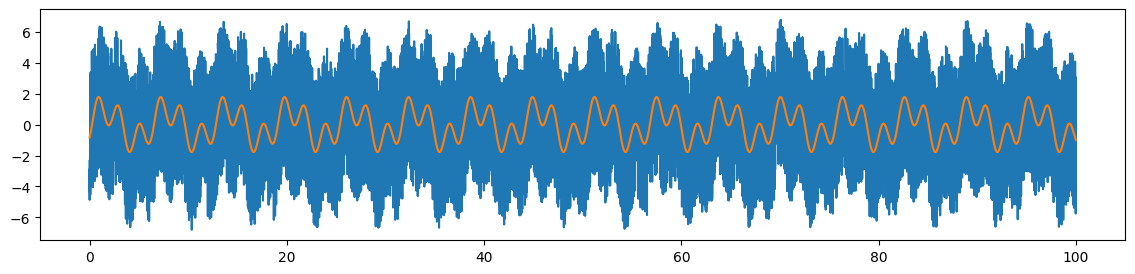

In [47]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
a = np.arange(0,100,dt)
noisy_signal = np.sin(a) + np.sin(3*a-1) + 10*np.random.rand(len(a))
clean_signal = np.sin(a) + np.sin(3*a-1)
plt.figure(figsize=(14,3))
plt.plot(a,noisy_signal-np.mean(noisy_signal))
plt.plot(a,clean_signal)
plt.show()


Kirjoita Python-ohjelma, jolla poistetaan kohina signaalista Fourier-analyysiä käyttäen.

Lasketaan aluksi Fourier-muunnos

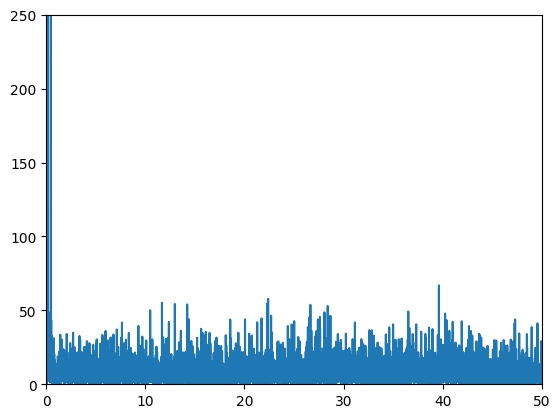

In [48]:
f=noisy_signal-np.mean(noisy_signal) #Signaali, josta poistettu keskiarvo
N = len(f) #Datapisteiden määrä
fourier = np.fft.fft(f,N)
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L],psd[L].real)
plt.axis([0,50,0,250])
plt.show()


Poistetaan kohina, eli jätetään pois kaikki taajuudet, joilla teho on alle 100

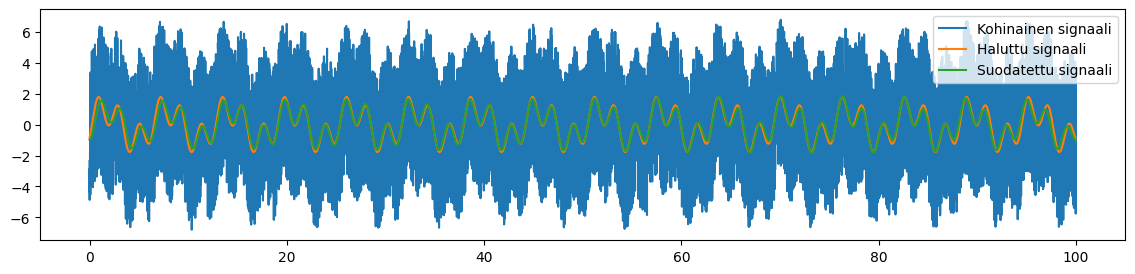

In [51]:
fourier_dom = fourier.copy() 
fourier_dom[psd.real<100] = 0 #Dominoivien taajuuksien fourier-muunnos
signal_fil = np.fft.ifft(fourier_dom) #Lasketaan suodatettu signaali

plt.figure(figsize=(14,3))
plt.plot(a,noisy_signal-np.mean(noisy_signal))
plt.plot(a,clean_signal)
plt.plot(a,signal_fil.real)
plt.legend(['Kohinainen signaali', 'Haluttu signaali', 'Suodatettu signaali'])
plt.show()
#Nyt alkuperäisen signaalin komponenttien jaksonajat ovat 2pi/3 ja 2pi
#Nyt datan pituus on 10s, jolloin matalamman taajuuden tapauksessa 
#datan matkalle ei mahdu kuin hiukan yli yksi jakso 

14. Lataa Moodlesta tiedosto signal to be cleaned.csv

a: Määrittele Fourier-analyysin avulla kolme tehokkainta taajuutta ja suodata muut taajuudet pois.
b: Mitkä ovat kolme tehokkainta taajuutta?
c: Piirrä alkuperäisen signaalin ja suodatetun signaalin kuvaajat

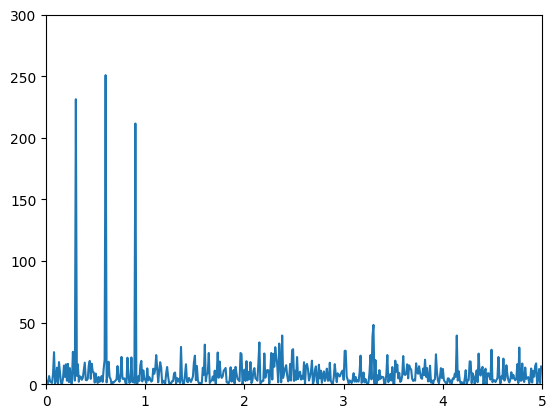

In [68]:
import pandas as pd

df = pd.read_csv('signal_to_be_cleaned.csv')
#plt.plot(df['Signal'])

#Oletetaan, että signaali on sämplätty 0.1s välein
dt = 0.1
f=df['Signal'] #Signaali, josta poistettu keskiarvo
N = len(f) #Datapisteiden määrä
fourier = np.fft.fft(f,N)
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L],psd[L].real)
plt.axis([0,5,0,300])
plt.show()


b: Mitkä ovat kolme tehokkainta taajuutta?

In [64]:
print('Tehokkaimmat taajuudet ovat: '),freq[psd>100][1:4]

Tehokkaimmat taajuudet ovat: 


array([0.3, 0.6, 0.9])

a: suodata muut taajuudet pois.
c: Piirrä alkuperäisen signaalin ja suodatetun signaalin kuvaajat

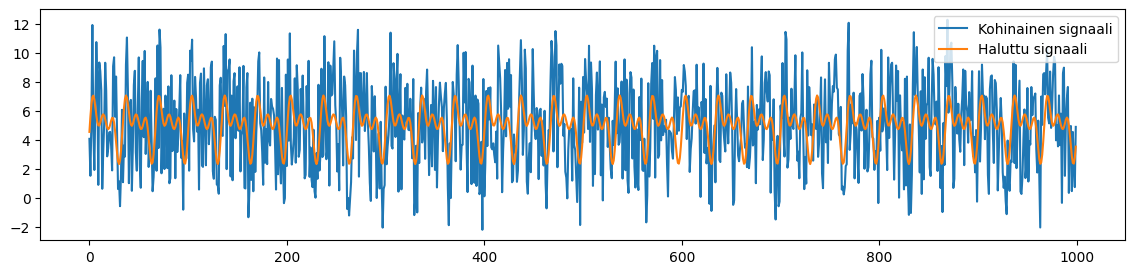

In [69]:
fourier_dom = fourier.copy() 
fourier_dom[psd.real<100] = 0 #Dominoivien taajuuksien fourier-muunnos
signal_fil = np.fft.ifft(fourier_dom) #Lasketaan suodatettu signaali

plt.figure(figsize=(14,3))
plt.plot(f)
plt.plot(signal_fil.real)
plt.legend(['Kohinainen signaali', 'Haluttu signaali', 'Suodatettu signaali'])
plt.show()

15. Kirjoita Fuorier-analyysiä käyttäen Pythonilla yli- ja alipäästäsuodatin. Testaa suodattimia esimerkiksi kävelyn aikana
tehtyjen kiihtyvyyshavaintojen suodattamiseen.

Tässä tehty suodatin on varsin karkea eikä vastaa Butterworth-suodatinta

Käytetään ensin suodattimen testaamiseen signaalia f edellisestä tehtävästä

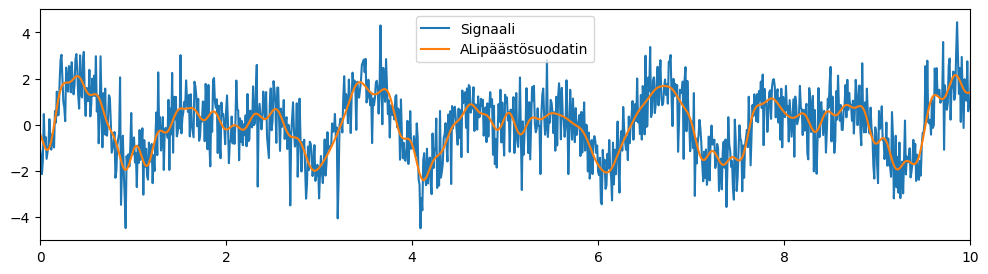

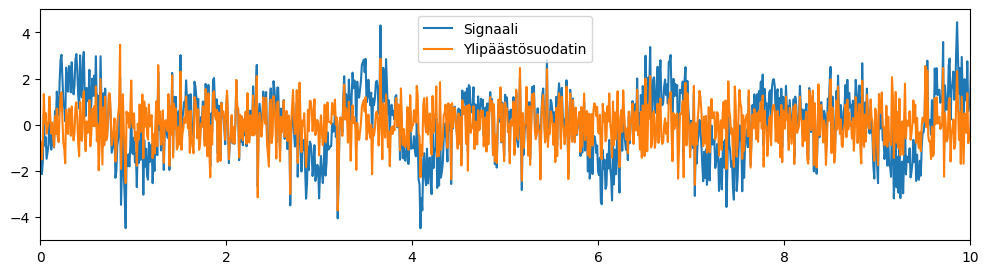

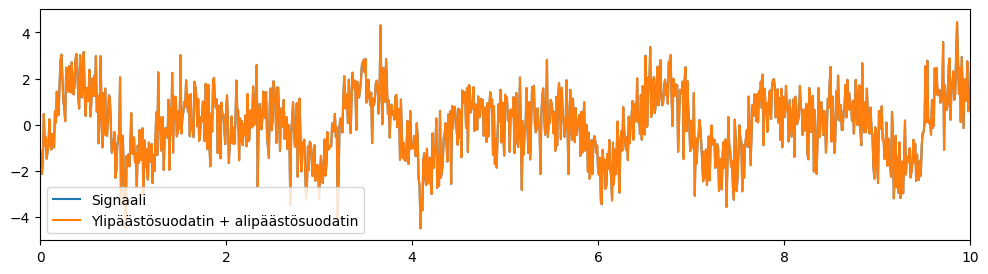

In [85]:
dt = 0.01
a = np.arange(0,100,dt)
f = np.sin(4*a) + np.sin(6*a-1) + np.random.randn(len(a))

cutoff = 5
def lowPassFilter(signal,dt,cutoff):
    N = len(signal) #Datapisteiden määrä
    fourier = np.fft.fft(f,N)
    psd = fourier*np.conj(fourier)/N #Tehospektri
    freq = np.fft.fftfreq(N,dt) #Taajuudet
    L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet
    fourier_filtered = fourier.copy() #Suodatin
    fourier_filtered[np.abs(freq) > cutoff] = 0 #Alipäästösuodatin
    filtered_signal = np.fft.ifft(fourier_filtered)
    return filtered_signal.real

def highPassFilter(signal,dt,cutoff):
    N = len(signal) #Datapisteiden määrä
    fourier = np.fft.fft(f,N)
    psd = fourier*np.conj(fourier)/N #Tehospektri
    freq = np.fft.fftfreq(N,dt) #Taajuudet
    L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet
    fourier_filtered = fourier.copy() #Suodatin
    fourier_filtered[np.abs(freq) < cutoff] = 0 #Ylipäästösuodatin
    filtered_signal = np.fft.ifft(fourier_filtered)
    return filtered_signal.real

plt.figure(figsize=(12,3))
plt.plot(a,f)
plt.plot(a,lowPassFilter(f,dt,5))
plt.legend(['Signaali', 'Alipäästösuodatin'])
plt.axis([0,10,-5,5])
plt.show()

plt.figure(figsize=(12,3))
plt.plot(a,f)
plt.plot(a,highPassFilter(f,dt,5))
plt.legend(['Signaali', 'Ylipäästösuodatin'])
plt.axis([0,10,-5,5])
plt.show()

plt.figure(figsize=(12,3))
plt.plot(a,f)
plt.plot(a,highPassFilter(f,dt,5)+lowPassFilter(f,dt,5))
plt.legend(['Signaali', 'Ylipäästösuodatin + alipäästösuodatin'])
plt.axis([0,10,-5,5])
plt.show()

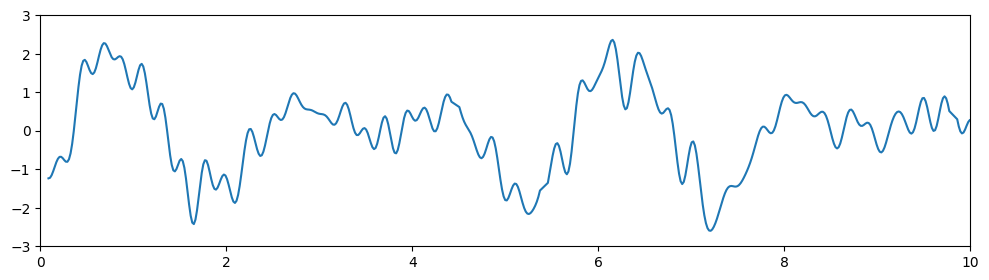

In [93]:
df = pd.read_csv(r'Acceleration.csv')

signal = df['Linear Acceleration y (m/s^2)']
dt = np.max(df['Time (s)'])/len(df)
filtered_signal = lowPassFilter(signal,dt,5)
plt.figure(figsize=(12,3))
plt.plot(df['Time (s)'],filtered_signal)
plt.axis([0,10,-3,3])
plt.show()